# This is Support Vector Machine Practice Code based on one of examples

In [2]:
import sys
print(sys.executable)


/Users/Steve/opt/anaconda3/envs/py38/bin/python


In [23]:
X = data.data[:,:2]
X.shape

(150, 2)

(150, 4)


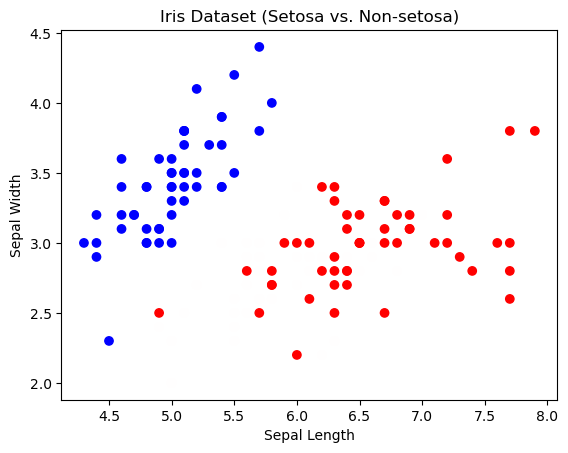

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
type(data)
print(data.data.shape)

X = data.data[:,:2]
y = data.target

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-setosa)')
plt.show()

In [32]:
class SVM:
    def __init__(self, name='SVM',learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.name = name
        self.lr = learning_rate
        self.lambda_param = lambda_param # L2 regularization strength
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit (self, X, y):
        n_samples, n_features = X.shape
        y_i = np.where(y >= 0, 1, -1).astype(float)
        
        self.w = np.zeros(n_features, dtype=float)
        self.b = 0.0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                margin = y_i[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if margin:
                    # only regularization term
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                    # b has no gradient when correctly classified with margin
                else:
                    # regularization + hinge loss gradient
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_i[idx]))
                    self.b += self.lr * y_i[idx] # note the plus sign
                    
    def decision_function(self, X):
        return np.dot(X, self.w) + self.b
    
    def predict(self, X):
        scores = self.decision_function(X)
        return np.where(scores>= 0, 1, -1)
                    

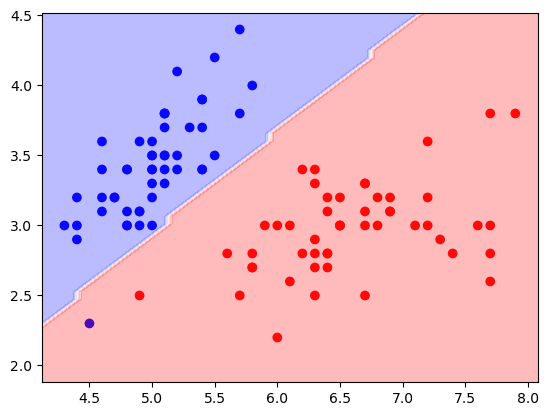

In [33]:
svm = SVM(learning_rate=0.001,  lambda_param=0.01, n_iters=1000)
svm.fit(X,y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0],ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()
    
    
plot_decision_boundary(X, y, svm)

In [43]:
new_samples = np.array([[0,0], [4,4]])
# new_samples = [[5.1, 3.5], [6.0, 2.7], [4.8, 3.0]]
predictions = svm.predict(new_samples)
print(predictions)

[-1 -1]


In [44]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X,y)

prediction_lib = clf.predict(new_samples)
prediction_lib = np.where(prediction_lib == 0 , -1, 1)
# print(new_samples)
print(prediction_lib)

[-1 -1]


In [47]:
new_samples = [[5.1, 3.5], [6.0, 2.7], [4.8, 3.0]]
prediction_lib = clf.predict(new_samples)
prediction_lib = np.where(prediction_lib == 0 , -1, 1)
print("New samples:", new_samples)
print("Predicted classes:", prediction_lib)

New samples: [[5.1, 3.5], [6.0, 2.7], [4.8, 3.0]]
Predicted classes: [-1  1 -1]
